# NBA Shooting Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.read_csv('nba_players_shooting.csv', index_col=0)
plt.style.use('ggplot')

#### Data Dictionary

|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the basket in ft  |
|Y        |float     |Vertical distance of the shot taken from the basket in ft    |
|RANGE    |String    |Radius range of the shot taken from the basket in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

## Basketball terms
### In this study, we will use a lot of basketball terms. Lets go over a few of them:
#### Shooting efficiency: percentage of made shots out of all taken shots (made shots / shots taken)
#### Opposition efficiency: efficiency of shots of the defensive assignment of analysed player

In [2]:
df = pd.read_csv('nba_players_shooting.csv', index_col=0)
df['RANGE'] = df.RANGE.astype("category")
df['RANGE'] = df.RANGE.cat.reorder_categories(['(0, 4)', '(5, 9)', '(10, 14)', '(15, 19)', '(20, 24)', '(25, 29)'], ordered=True)

# Shooting efficiency
### What is the overall efficiency for these players?

In [4]:
misses = df[df['SCORE'] == 'MISSED'].sort_values('SHOOTER').groupby('SHOOTER')['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values('SHOOTER').groupby('SHOOTER')['X'].count()
df_pct = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct.reset_index(inplace=True)
df_pct['total_shots'] = df_pct.sum(axis=1)
df_pct['efficiency'] = round(df_pct['made_shots'] / df_pct['total_shots'] * 100, 2)
df_pct[['SHOOTER', 'efficiency']].sort_values('efficiency', ascending=False)

,SHOOTER,efficiency
2,Seth Curry,57.82
0,Chris Paul,48.61
3,Trae Young,43.16
1,Russell Westbrook,33.33


### However, efficiency alone does not answer all of our questions. Lets also look at how many shots each player in our dataset took and then try to draw some conclusions:

In [5]:
df_pct[['SHOOTER', 'efficiency', 'total_shots']].sort_values('efficiency', ascending=False)

,SHOOTER,efficiency,total_shots
2,Seth Curry,57.82,147
0,Chris Paul,48.61,216
3,Trae Young,43.16,329
1,Russell Westbrook,33.33,84


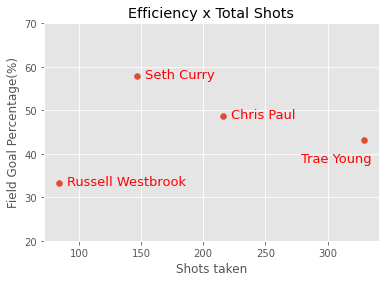

In [6]:
plt.scatter(df_pct['total_shots'], 
            df_pct['efficiency'],
               )
for i in range(df_pct.shape[0]):
    if df_pct['SHOOTER'][i] != 'Trae Young':
        plt.text(x=df_pct['total_shots'][i]+6,
              y=df_pct['efficiency'][i]-0.5,
              s=df_pct['SHOOTER'][i],
              fontdict=dict(color='red',size=13))
    else:
        plt.text(x=df_pct['total_shots'][i]-50,
              y=df_pct['efficiency'][i]-5,
              s=df_pct['SHOOTER'][i],
              fontdict=dict(color='red',size=13))
plt.title('Efficiency x Total Shots')
plt.xlabel('Shots taken')
plt.ylabel('Field Goal Percentage(%)')
plt.ylim(20, 70)
plt.show()

### By total shooting efficiency, Seth Curry leads all players with a good margin, but he did not take that many shots. Trae Young for example, even though had the third lowest efficiency, took the most shots of all players in our dataset (more than 40% of total shots). 
### Chris Paul is pretty much dead center on our graphic: almost 50% shooting efficiency and 216 shots taken, which represents 27% of all shots in our dataset. So, what is the best option: high volume shooting with below average efficiency or a "pick your spots" approach, with less shots but higher efficiency?
### Now lets at what is the efficiency for these players for each different range presented in the dataset?

In [99]:
# efficiency per zone per player
misses = df[df['SCORE'] == 'MISSED'].sort_values(['SHOOTER', 'RANGE']).groupby(['SHOOTER', 'RANGE'])['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values(['SHOOTER', 'RANGE']).groupby(['SHOOTER', 'RANGE'])['X'].count()
df_pct_range = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct_range.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct_range.reset_index(inplace=True)
df_pct_range['total_shots'] = df_pct_range.sum(axis=1)
df_pct_range['efficiency'] = round(df_pct_range['made_shots'] / df_pct_range['total_shots'] * 100, 2)
df_pct_range.sort_values(['RANGE', 'efficiency'], ascending=[True, False])[['SHOOTER', 'RANGE', 'efficiency']]

,SHOOTER,RANGE,efficiency
0,Chris Paul,"(0, 4)",75.00
12,Seth Curry,"(0, 4)",68.75
18,Trae Young,"(0, 4)",52.38
6,Russell Westbrook,"(0, 4)",40.00
13,Seth Curry,"(5, 9)",66.67
1,Chris Paul,"(5, 9)",59.09
19,Trae Young,"(5, 9)",47.17
7,Russell Westbrook,"(5, 9)",11.11
8,Russell Westbrook,"(10, 14)",66.67
20,Trae Young,"(10, 14)",49.15


### That looks really complicated to understand. Lets plot a grouped bars graph to better understand these numbers:

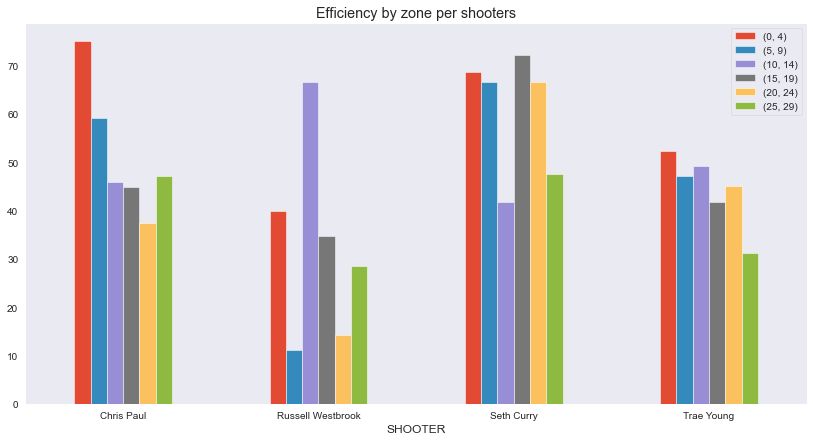

In [105]:
df_pct_range_plot = df_pct_range.pivot(index='SHOOTER', columns='RANGE', values='efficiency')
df_pct_range_plot.columns = df_pct_range_plot.columns.tolist()
df_pct_range_plot.reset_index().plot(x='SHOOTER', 
                           kind='bar', 
                           stacked=False, 
                           figsize=(14, 7), 
                           rot=0, 
                           title='Efficiency by zone per shooters')
plt.show()

In [8]:
# best shooter by zone 
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('RANGE')['efficiency'].idxmax())][['SHOOTER', 'RANGE', 'efficiency']].sort_values('RANGE')

,SHOOTER,RANGE,efficiency
0,Chris Paul,"(0, 4)",75.00
13,Seth Curry,"(5, 9)",66.67
8,Russell Westbrook,"(10, 14)",66.67
15,Seth Curry,"(15, 19)",72.22
16,Seth Curry,"(20, 24)",66.67
17,Seth Curry,"(25, 29)",47.46


### As we can see, Seth Curry is also dominating the efficiency by zone with excellent FG% in almost all ranges. Even for the ranges where he is not the leader, he still has good efficiency.

### Lets see now what are the "hot zones" for each of the shooters!

In [9]:
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('SHOOTER')['efficiency'].idxmax())][['SHOOTER', 'RANGE', 'efficiency']].sort_values('RANGE')

,SHOOTER,RANGE,efficiency
0,Chris Paul,"(0, 4)",75.00
18,Trae Young,"(0, 4)",52.38
8,Russell Westbrook,"(10, 14)",66.67
15,Seth Curry,"(15, 19)",72.22


### Chris Paul and Trae Young have their best efficiency closer to the rim, while Westbrook and Seth are both shooting better from the midrange

# Defensive impact
### Now lets look at the other side of the ball: defense. Which player forced the most field goal misses?

In [10]:
df[df['SCORE'] == 'MISSED'].groupby(['DEFENDER'])['X'].count().reset_index().rename(columns={"X": "missed_shots_forced"}).sort_values('missed_shots_forced', ascending=False)

,DEFENDER,missed_shots_forced
1,Russell Westbrook,172
2,Seth Curry,106
0,Chris Paul,96
3,Trae Young,42


### Russell Westbrook force the most missed shots while being the main defender.
### However, he could have just had more defensive possessions. So lets analyze the data and calculate which player allowed the lowest field goal percentage?

In [112]:
misses = df[df['SCORE'] == 'MISSED'].sort_values('DEFENDER').groupby('DEFENDER')['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values('DEFENDER').groupby('DEFENDER')['X'].count()
df_pct = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct.reset_index(inplace=True)
df_pct['total_shots'] = df_pct.sum(axis=1)
df_pct['opp_efficiency'] = round(df_pct['made_shots'] / df_pct['total_shots'] * 100, 2)
df_pct[['DEFENDER', 'opp_efficiency']].sort_values('opp_efficiency')

,DEFENDER,opp_efficiency
1,Russell Westbrook,25.86
2,Seth Curry,44.50
0,Chris Paul,51.27
3,Trae Young,73.08


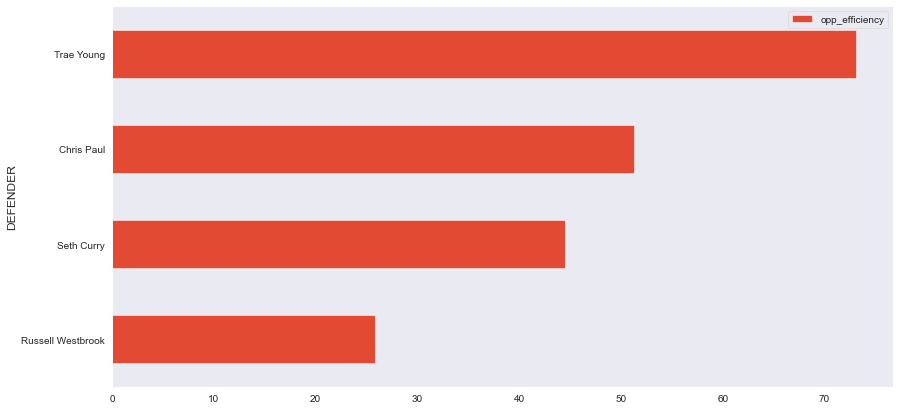

In [121]:
df_pct[['DEFENDER', 'opp_efficiency']].set_index('DEFENDER').sort_values('opp_efficiency').plot(kind='barh', figsize=(14, 7))
plt.show()

### As we can see, the order is the same for both stats. So our initial assumption was correct: Westbrook held his matchup to the lowest field goal percentage of all 4 players as defenders.

### Now, lets look at each different range and see who are the best and worst defenders.

In [12]:
# lowest opposing field goal percentage
df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'RANGE']).groupby(['DEFENDER', 'RANGE'])['X'].count()
misses = df[df['SCORE'] == 'MISSED'].sort_values(['DEFENDER', 'RANGE']).groupby(['DEFENDER', 'RANGE'])['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'RANGE']).groupby(['DEFENDER', 'RANGE'])['X'].count()
df_pct_range = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct_range.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct_range.reset_index(inplace=True)
df_pct_range['total_shots'] = df_pct_range.sum(axis=1)
df_pct_range['opp_efficiency'] = round(df_pct_range['made_shots'] / df_pct_range['total_shots'] * 100, 2)
df_pct_range.sort_values(['RANGE', 'opp_efficiency'])[['DEFENDER', 'RANGE', 'opp_efficiency']]
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('RANGE')['opp_efficiency'].idxmin())][['DEFENDER', 'RANGE', 'opp_efficiency']].sort_values('RANGE')

,DEFENDER,RANGE,opp_efficiency
6,Russell Westbrook,"(0, 4)",36.67
7,Russell Westbrook,"(5, 9)",31.82
8,Russell Westbrook,"(10, 14)",18.42
9,Russell Westbrook,"(15, 19)",23.40
10,Russell Westbrook,"(20, 24)",28.57
11,Russell Westbrook,"(25, 29)",24.32


In [13]:
# highest opposing field goal percentage
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('RANGE')['opp_efficiency'].idxmax())][['DEFENDER', 'RANGE', 'opp_efficiency']].sort_values('RANGE')

,DEFENDER,RANGE,opp_efficiency
18,Trae Young,"(0, 4)",69.57
19,Trae Young,"(5, 9)",61.90
20,Trae Young,"(10, 14)",75.00
21,Trae Young,"(15, 19)",67.57
22,Trae Young,"(20, 24)",93.33
23,Trae Young,"(25, 29)",78.57


### Clearly, the player you want defending the ball down the stretch of a game is Westbrook. And you want to avoid at all costs getting Trae Young defending the ball handler of the opposing team.

### Now lets look at direct matchups. Which player each one defended the best?

In [14]:
df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'SHOOTER']).groupby(['DEFENDER', 'SHOOTER'])['X'].count()
misses = df[df['SCORE'] == 'MISSED'].sort_values(['DEFENDER', 'SHOOTER']).groupby(['DEFENDER', 'SHOOTER'])['X'].count()
makes = df[df['SCORE'] == 'MADE'].sort_values(['DEFENDER', 'SHOOTER']).groupby(['DEFENDER', 'SHOOTER'])['X'].count()
df_pct_range = pd.merge(makes, misses, left_index=True, right_index=True, suffixes=('_make', '_miss'))
df_pct_range.rename(columns={"X_miss": "missed_shots", "X_make": "made_shots"}, inplace=True)
df_pct_range.reset_index(inplace=True)
df_pct_range['total_shots'] = df_pct_range.sum(axis=1)
df_pct_range['opp_efficiency'] = round(df_pct_range['made_shots'] / df_pct_range['total_shots'] * 100, 2)
df_pct_range.sort_values(['DEFENDER', 'opp_efficiency'])[['DEFENDER', 'SHOOTER', 'opp_efficiency']]
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('DEFENDER')['opp_efficiency'].idxmin())][['DEFENDER', 'SHOOTER', 'opp_efficiency']]

,DEFENDER,SHOOTER,opp_efficiency
0,Chris Paul,Russell Westbrook,25.81
3,Russell Westbrook,Chris Paul,22.37
7,Seth Curry,Russell Westbrook,13.64
10,Trae Young,Russell Westbrook,54.84


In [15]:
df_pct_range[df_pct_range.index.isin(df_pct_range.groupby('DEFENDER')['opp_efficiency'].idxmin())][['DEFENDER', 'SHOOTER', 'opp_efficiency']]

,DEFENDER,SHOOTER,opp_efficiency
0,Chris Paul,Russell Westbrook,25.81
3,Russell Westbrook,Chris Paul,22.37
7,Seth Curry,Russell Westbrook,13.64
10,Trae Young,Russell Westbrook,54.84


### As we probably expected, Russell Westbrook is the worst matchup for the shooters in our dataset. His best defender is Chris Paul.

## Lets spice things up and try to plot a basketball court and visualize the shots.

### Lets start creating a function that will draw a basketball court onto our graphic.

In [16]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 4.7), radius=0.55, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-3, 4), 6, -0.1, linewidth=lw, color=color)

    # The paint
    outer_box = Rectangle((-12, 0), 24, 19, linewidth=lw, color=color,
                          fill=False)
    inner_box = Rectangle((-8, 0), 16, 19, linewidth=lw, color=color,
                          fill=False)

    top_free_throw = Arc((0, 18.25), 16, 12, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 18.25), 16, 12, theta1=18, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 4), 10, 10, theta1=18, theta2=-195, linewidth=lw,
                     color=color)

    corner_three_a = Rectangle((-22, 0), 0, 14, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((22, 0), 0, 14, linewidth=lw, color=color)
    three_arc = Arc((0, 14), 44, 31, theta1=0, theta2=180, linewidth=lw,
                    color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc]

    if outer_lines:
        outer_lines = Rectangle((-25, 0), 50, 47, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax

### Now we can plot the shots the players in our dataset have taken based on the X and Y coordinates. 
### Lets plot the shot chart for all the players in our dataset:

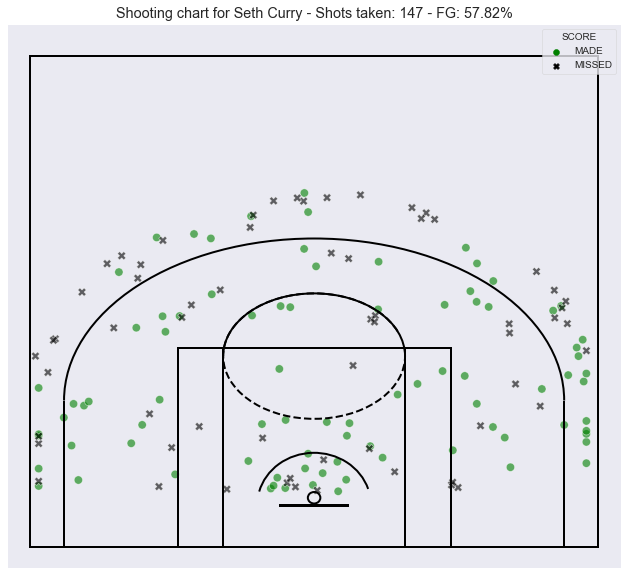

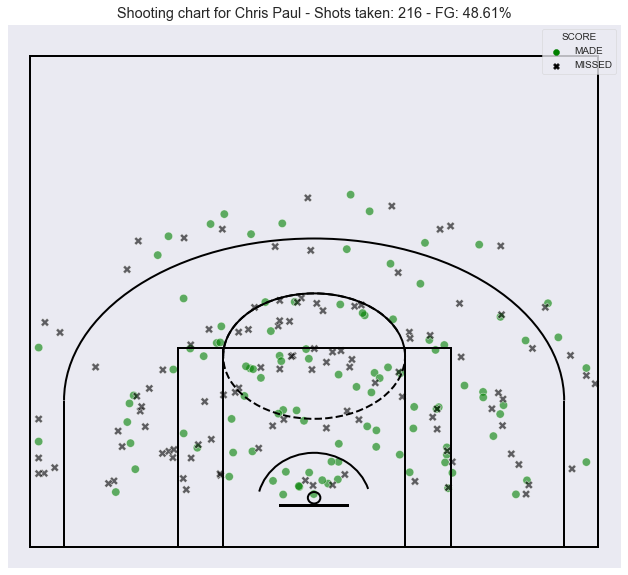

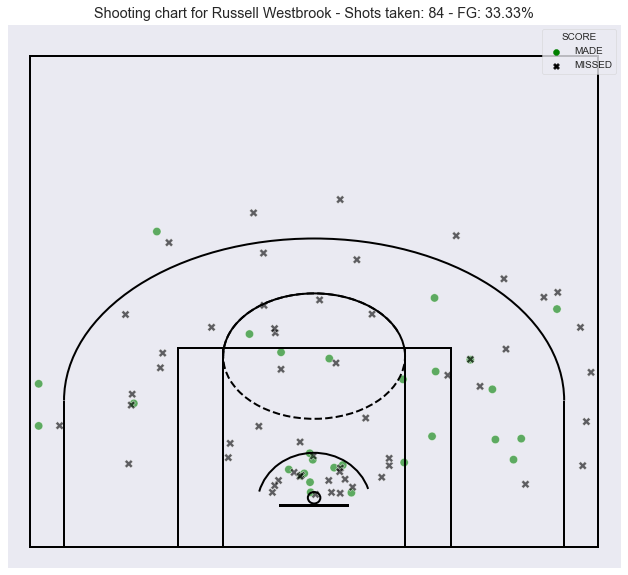

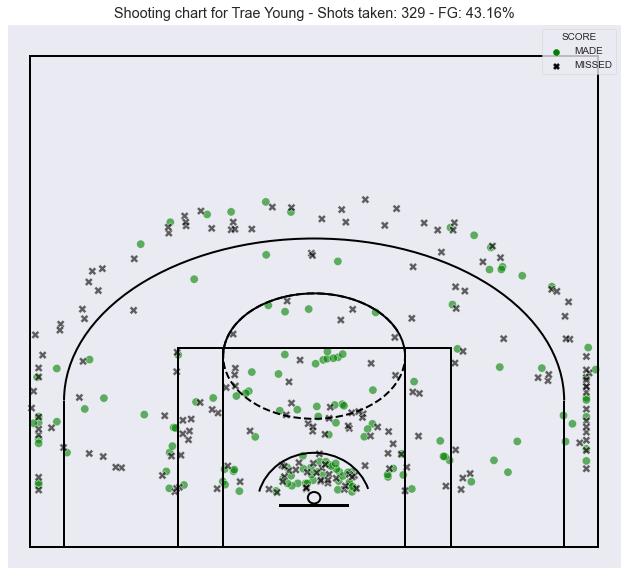

In [17]:
for player in df['SHOOTER'].unique():
    plt.figure(figsize=(11,10))
    sns.set_style('dark')
    sns.scatterplot(data=df[df['SHOOTER']== player], 
                    x='X', y='Y', hue='SCORE',  
                    palette={'MADE':'green', 'MISSED':'black'},
                    markers = {"MADE": "o", "MISSED": "X"},
                    style="SCORE",
                    s=70, alpha=0.6)
    draw_court(outer_lines=True)
    plt.xlim(-27,27)
    plt.ylim(-2,50)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
    fg_pct = round(df.loc[(df['SHOOTER'] == player) & (df['SCORE'] == 'MADE')].shape[0] / df.loc[(df['SHOOTER'] == player)].shape[0] * 100, 2)
    plt.title('Shooting chart for ' + player + ' - Shots taken: ' + str(df.loc[(df['SHOOTER'] == player)].shape[0]) + ' - FG: ' + str(fg_pct) + '%')
    plt.show()


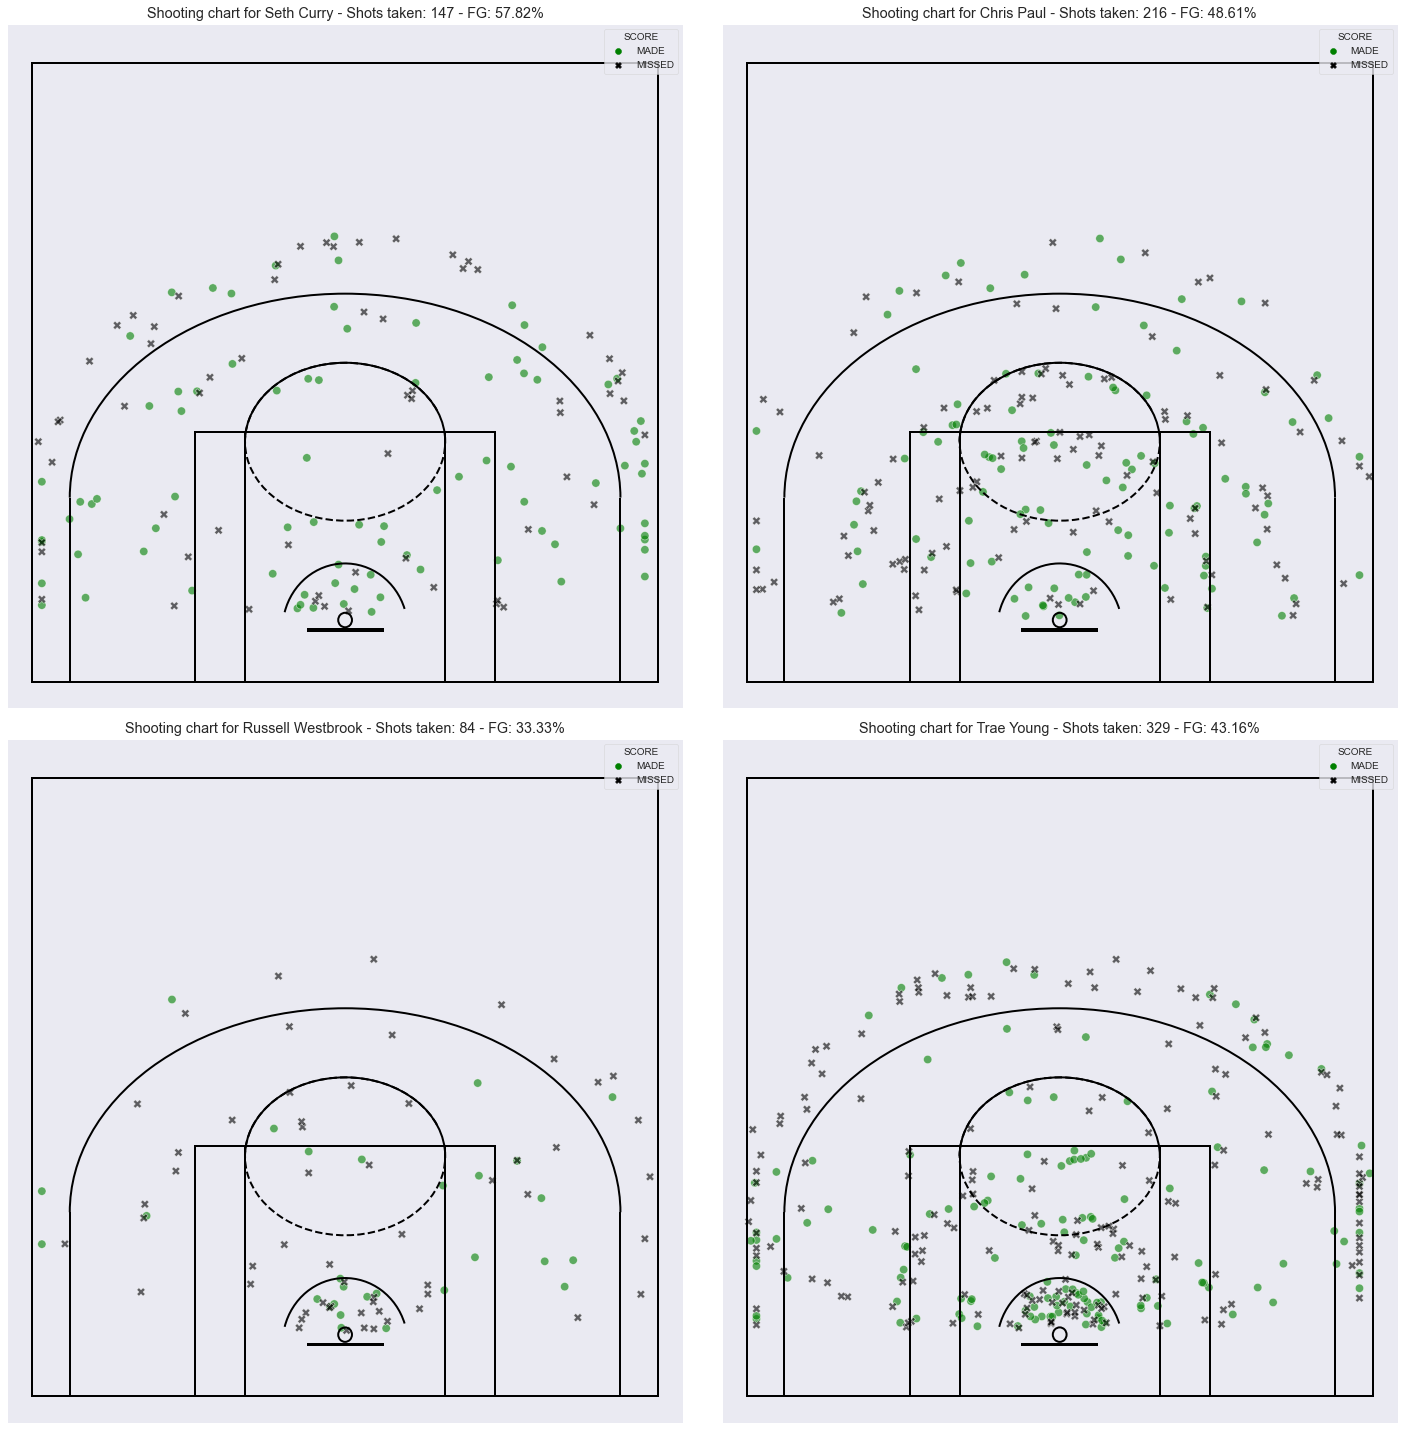

In [18]:
sns.set_style('dark')
fig, ax = plt.subplots(2,2, figsize=(20, 20))
plt.tight_layout()

for i, player in enumerate(df['SHOOTER'].unique()):
    spot = [[0, 0], [0, 1], [1, 0], [1,1]]
    sns.scatterplot(ax=ax[spot[i][0], spot[i][1]],
                    data=df[df['SHOOTER']== player], 
                        x='X', y='Y', hue='SCORE',  
                        palette={'MADE':'green', 'MISSED':'black'},
                        markers = {"MADE": "o", "MISSED": "X"},
                        style="SCORE",
                        s=70, alpha=0.6)
    draw_court(ax=ax[spot[i][0], spot[i][1]], outer_lines=True)
    ax[spot[i][0], spot[i][1]].set_xlim(-27,27)
    ax[spot[i][0], spot[i][1]].set_ylim(-2,50)
    ax[spot[i][0], spot[i][1]].set_xlabel(None)
    ax[spot[i][0], spot[i][1]].set_ylabel(None)
    ax[spot[i][0], spot[i][1]].set_xticks([])
    ax[spot[i][0], spot[i][1]].set_yticks([])
    fg_pct = round(df.loc[(df['SHOOTER'] == player) & (df['SCORE'] == 'MADE')].shape[0] / df.loc[(df['SHOOTER'] == player)].shape[0] * 100, 2)
    title = 'Shooting chart for ' + player + ' - Shots taken: ' + str(df.loc[(df['SHOOTER'] == player)].shape[0]) + ' - FG: ' + str(fg_pct) + '%'
    ax[spot[i][0], spot[i][1]].set_title(title)
# fig.savefig('test.png')
plt.show()

### Some very interesting visualizations here. 
### Westbrook didnt have a high field goal percentage, but he also did not have a high amount fo shots taken, only 10% of all shots of our dataset.

In [19]:
# percentage of shots by shooter in our dataset
df.groupby('SHOOTER').count()['SCORE'] / df.shape[0] * 100

SHOOTER
Chris Paul           27.835052
Russell Westbrook    10.824742
Seth Curry           18.943299
Trae Young           42.396907
Name: SCORE, dtype: float64

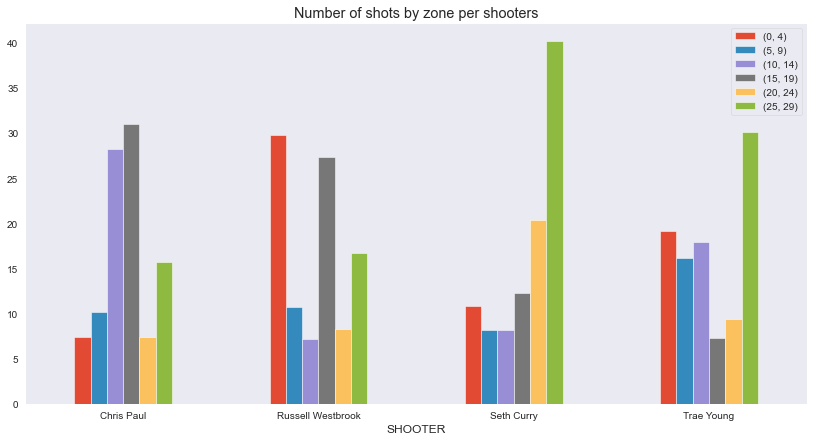

In [104]:
df_test = round(df.groupby(['SHOOTER', 'RANGE']).count()['SCORE'] / df.groupby('SHOOTER').count()['SCORE'] * 100, 2).reset_index()
df_test = df_test.pivot(index='SHOOTER', columns='RANGE', values='SCORE')
df_test.columns = df_test.columns.tolist()
df_test.reset_index().plot(x='SHOOTER', 
                           kind='bar', 
                           stacked=False, 
                           figsize=(14, 7), 
                           rot=0, 
                           title='Number of shots by zone per shooters')
plt.show()

In [69]:
df_test = df_test.pivot(index='SHOOTER', columns='RANGE', values='SCORE')
df_test

RANGE,"(0, 4)","(5, 9)","(10, 14)","(15, 19)","(20, 24)","(25, 29)"
SHOOTER,,,,,,
Chris Paul,7.41,10.19,28.24,31.02,7.41,15.74
Russell Westbrook,29.76,10.71,7.14,27.38,8.33,16.67
Seth Curry,10.88,8.16,8.16,12.24,20.41,40.14
Trae Young,19.15,16.11,17.93,7.29,9.42,30.09


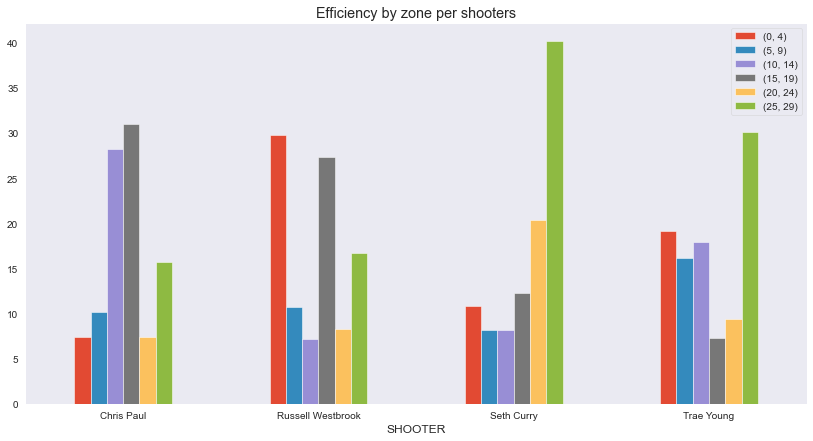

In [95]:
df_test.columns = df_test.columns.tolist()
# plt.figure(figsize=(16, 16))
df_test.reset_index().plot(x='SHOOTER', 
                           kind='bar', 
                           stacked=False, 
                           figsize=(14, 7), 
                           rot=0, 
                           title='Efficiency by zone per shooters')
plt.show()

In [62]:
pd.pivot_table(df_test, index='SHOOTER', columns='RANGE', values=['SCORE']).reset_index()

SHOOTER  SCORE                                           
RANGE                    (0, 4) (5, 9) (10, 14) (15, 19) (20, 24) (25, 29)
0             Chris Paul   7.41  10.19    28.24    31.02     7.41    15.74
1      Russell Westbrook  29.76  10.71     7.14    27.38     8.33    16.67
2             Seth Curry  10.88   8.16     8.16    12.24    20.41    40.14
3             Trae Young  19.15  16.11    17.93     7.29     9.42    30.09

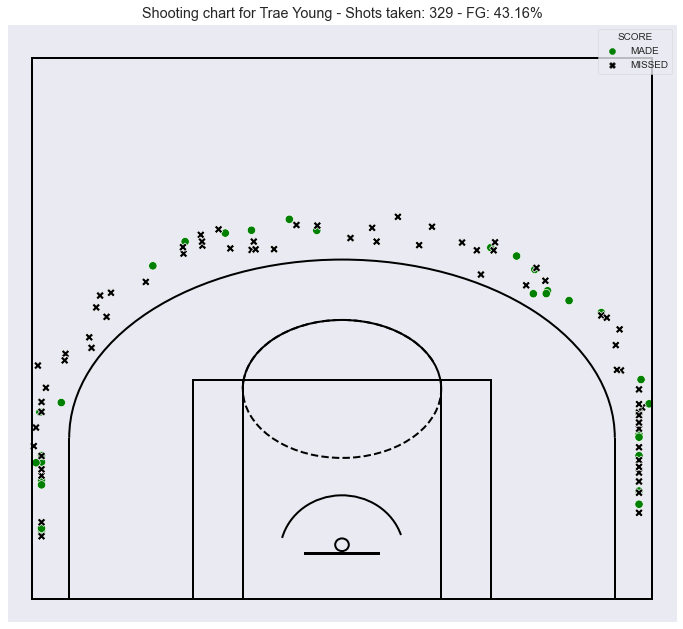

In [21]:
# zone
player = 'Trae Young'
plt.figure(figsize=(12,11))
sns.set_style('dark')
sns.scatterplot(data=df[(df['SHOOTER']== player) & (df['RANGE'] == df.RANGE.unique()[5])], 
                x='X', y='Y', hue='SCORE',  
                palette={'MADE':'green', 'MISSED':'black'},
                markers = {"MADE": "o", "MISSED": "X"},
                style="SCORE",
                s=70)
draw_court(outer_lines=True)
plt.xlim(-27,27)
plt.ylim(-2,50)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
fg_pct = round(df.loc[(df['SHOOTER'] == player) & (df['SCORE'] == 'MADE')].shape[0] / df.loc[(df['SHOOTER'] == player)].shape[0] * 100, 2)
plt.title('Shooting chart for ' + player + ' - Shots taken: ' + str(df.loc[(df['SHOOTER'] == player)].shape[0]) + ' - FG: ' + str(fg_pct) + '%')
# plt.grid(axis='y')
plt.show()

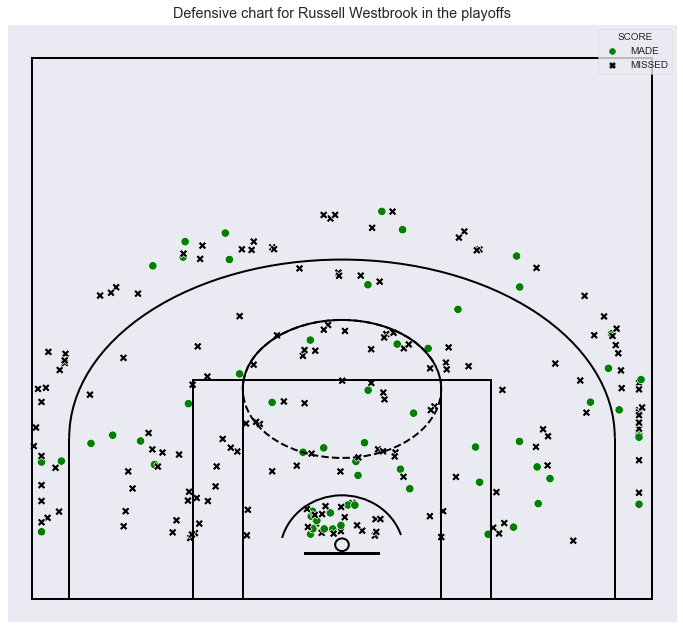

In [22]:
# defense
player = 'Russell Westbrook'
plt.figure(figsize=(12,11))
sns.set_style('dark')
sns.scatterplot(data=df[df['DEFENDER'] == player], 
                x='X', y='Y', hue='SCORE',  
                palette={'MADE':'green', 'MISSED':'black'},
                markers = {"MADE": "o", "MISSED": "X"},
                style="SCORE",
                s=70)
draw_court(outer_lines=True)
plt.xlim(-27,27)
plt.ylim(-2,50)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
plt.title('Defensive chart for ' + player + ' in the playoffs')
# plt.grid(axis='y')
plt.show()

In [24]:
df

,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
INDEX,,,,,,
0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE
...,...,...,...,...,...,...
771,Trae Young,23.952742,15.324875,"(25, 29)",Russell Westbrook,MISSED
772,Trae Young,6.221766,30.756008,"(25, 29)",Seth Curry,MISSED
773,Trae Young,16.397467,27.660323,"(25, 29)",Chris Paul,MISSED


In [25]:
df['SHOOTER'].unique()

array(['Seth Curry', 'Chris Paul', 'Russell Westbrook', 'Trae Young'],
      dtype=object)

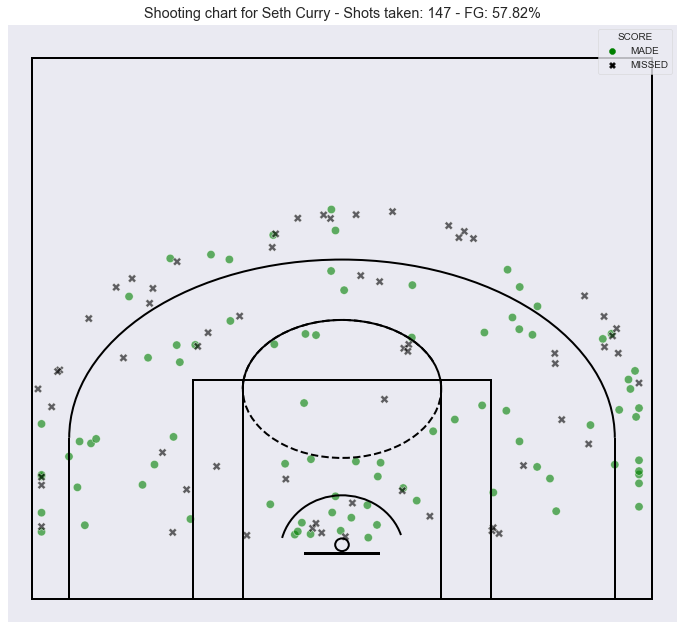

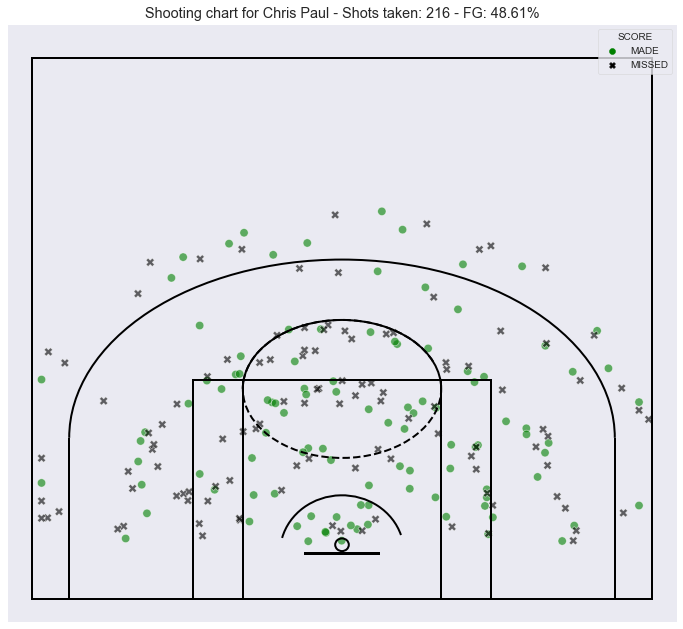

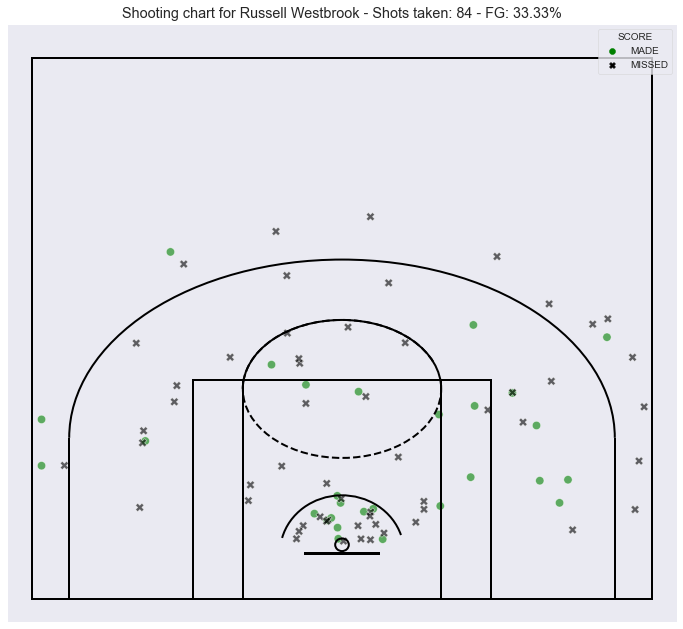

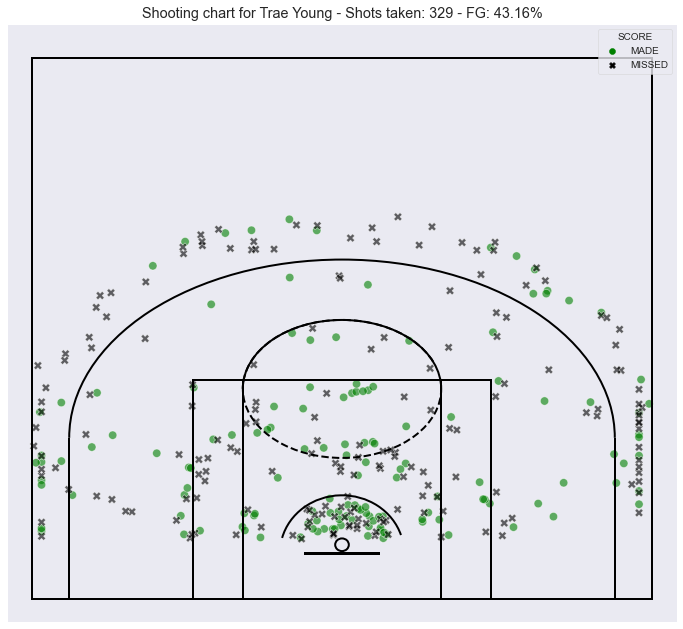

In [26]:
for player in df['SHOOTER'].unique():
# player = 'Seth Curry'
    plt.figure(figsize=(12,11))
    sns.set_style('dark')
    sns.scatterplot(data=df[df['SHOOTER']== player], 
                    x='X', y='Y', hue='SCORE',  
                    palette={'MADE':'green', 'MISSED':'black'},
                    markers = {"MADE": "o", "MISSED": "X"},
                    style="SCORE",
                    s=70, alpha=0.6)
    draw_court(outer_lines=True)
    plt.xlim(-27,27)
    plt.ylim(-2,50)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
    fg_pct = round(df.loc[(df['SHOOTER'] == player) & (df['SCORE'] == 'MADE')].shape[0] / df.loc[(df['SHOOTER'] == player)].shape[0] * 100, 2)
    plt.title('Shooting chart for ' + player + ' - Shots taken: ' + str(df.loc[(df['SHOOTER'] == player)].shape[0]) + ' - FG: ' + str(fg_pct) + '%')
    plt.show()


In [27]:
df.describe()

,X,Y
count,776.000000,776.000000
mean,0.492154,15.400099
std,12.934870,8.009152
min,-24.856870,5.008911
25%,-8.227266,8.151474
50%,0.318647,13.665261
75%,9.782513,21.175087
max,24.767551,33.853913


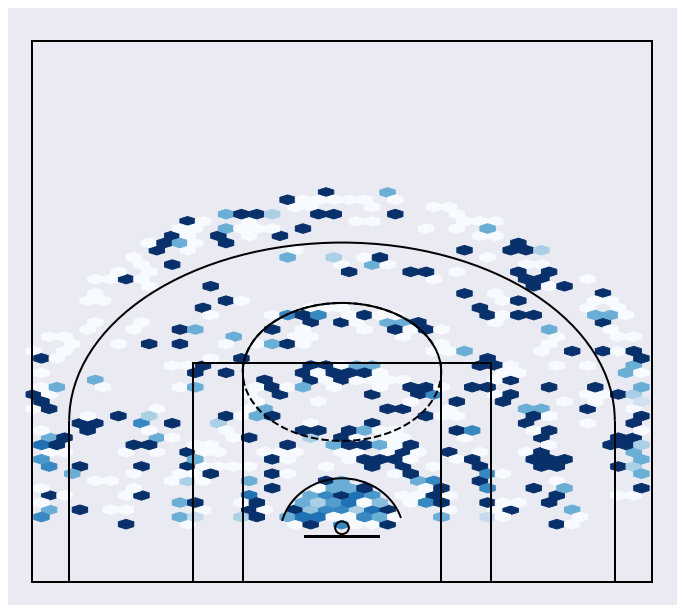

In [28]:
plt.figure(figsize=(12,11))
sns.set_style('dark')
plt.hexbin(x=df['X'], y=df['Y'], gridsize=40,cmap='Blues', C=df['SCORE'].replace({'MADE': 1, 'MISSED': 0}))
draw_court(outer_lines=True)
plt.xlim(-27,27)
plt.ylim(-2,50)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='both', which='both', labelleft=False, labelbottom=False)
plt.show()

In [29]:
for i, player in enumerate(df['SHOOTER'].unique()):
    print(spot[i])
# players

[0, 0]
[0, 1]
[1, 0]
[1, 1]
